In [ ]:
#Import needed packages
import sqlalchemy
import sql_functions as sf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Pulling the table 'MutualFunds_raw' from SQL schema
schema = 'cgn_analytics_23_2' # schema name
# Display the dataframe
mf_df = sf.get_dataframe(f'SELECT * FROM {schema}."MutualFunds_raw"')
mf_df.head(3)

In [1]:
#mf_df['morningstar_risk_rating']

To do: Descriptive stats for all the KPIs, range for the data that we have


In [3]:
# Some statistical data using dataframe.column.describe()
# mf_df.fund_return_10years.describe()
mf_df[['esg_score','fund_return_10years','year_to_date_return','fund_alpha_10years',
'fund_beta_10years','fund_sharpe_ratio_10years','fund_mean_annual_return_10years',
'morningstar_risk_rating','fund_alpha_10years','fund_beta_10years','fund_sharpe_ratio_10years','total_net_assets']].describe()

,esg_score,fund_return_10years,year_to_date_return,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,fund_mean_annual_return_10years,morningstar_risk_rating,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,total_net_assets
count,15407.000000,12437.000000,23382.000000,16669.000000,16703.000000,16694.000000,16704.000000,21976.000000,16669.000000,16703.000000,16694.000000,2.374900e+04
mean,23.767634,0.080488,0.093485,-0.672203,0.952347,0.705999,0.704089,3.069121,-0.672203,0.952347,0.705999,4.924192e+09
std,2.996519,0.056927,0.082276,3.339857,0.498500,0.291560,0.444381,1.106317,3.339857,0.498500,0.291560,2.109765e+10
min,8.250000,-0.408200,-0.522800,-37.200000,-25.340000,-4.360000,-3.910000,1.000000,-37.200000,-25.340000,-4.360000,1.000000e+01
25%,22.100000,0.040600,0.026100,-2.000000,0.860000,0.570000,0.370000,2.000000,-2.000000,0.860000,0.570000,1.445834e+08
50%,23.390000,0.078500,0.092000,-0.370000,1.020000,0.740000,0.690000,3.000000,-0.370000,1.020000,0.740000,6.443283e+08
75%,25.040000,0.117700,0.149700,0.890000,1.130000,0.890000,1.010000,4.000000,0.890000,1.130000,0.890000,2.453409e+09
max,41.210000,0.398600,0.578900,25.920000,5.210000,2.630000,3.220000,5.000000,25.920000,5.210000,2.630000,7.534100e+11


Text(0.5, 0, 'Year-to-date return')

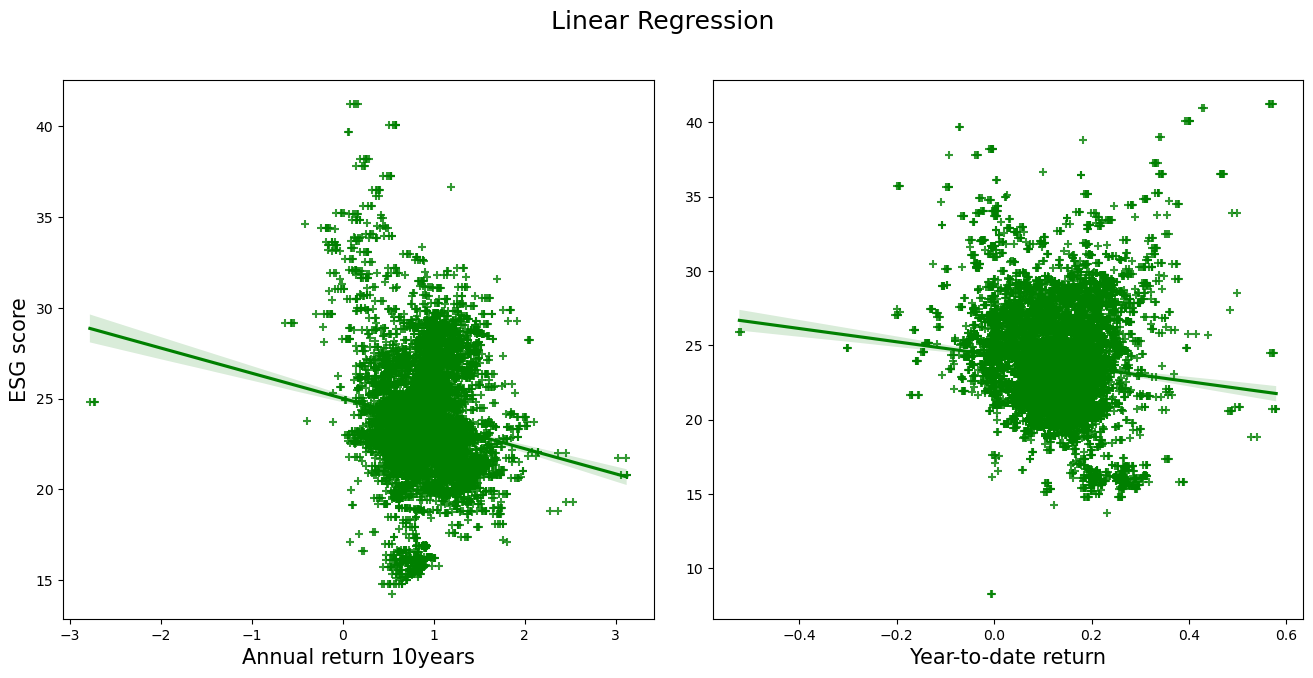

In [32]:
#regression line
fig, axes = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'hspace': 0.0, 'wspace': 0.1})

fig.suptitle('Linear Regression', fontsize=18)

pen = sns.regplot(ax=axes[0],data=mf_df, x=mf_df.fund_mean_annual_return_10years, y=mf_df.esg_score, color='g', marker='+')
pen.set_ylabel("ESG score",fontsize=15)
pen.set_xlabel("Annual return 10years",fontsize=15)

dun = sns.regplot(ax=axes[1],data=mf_df, x=mf_df.year_to_date_return, y=mf_df.esg_score, color='g', marker='+')
dun.set(ylabel='')
dun.set_xlabel("Year-to-date return",fontsize=15)


Text(0.5, 0, 'Fund sharpe ratio')

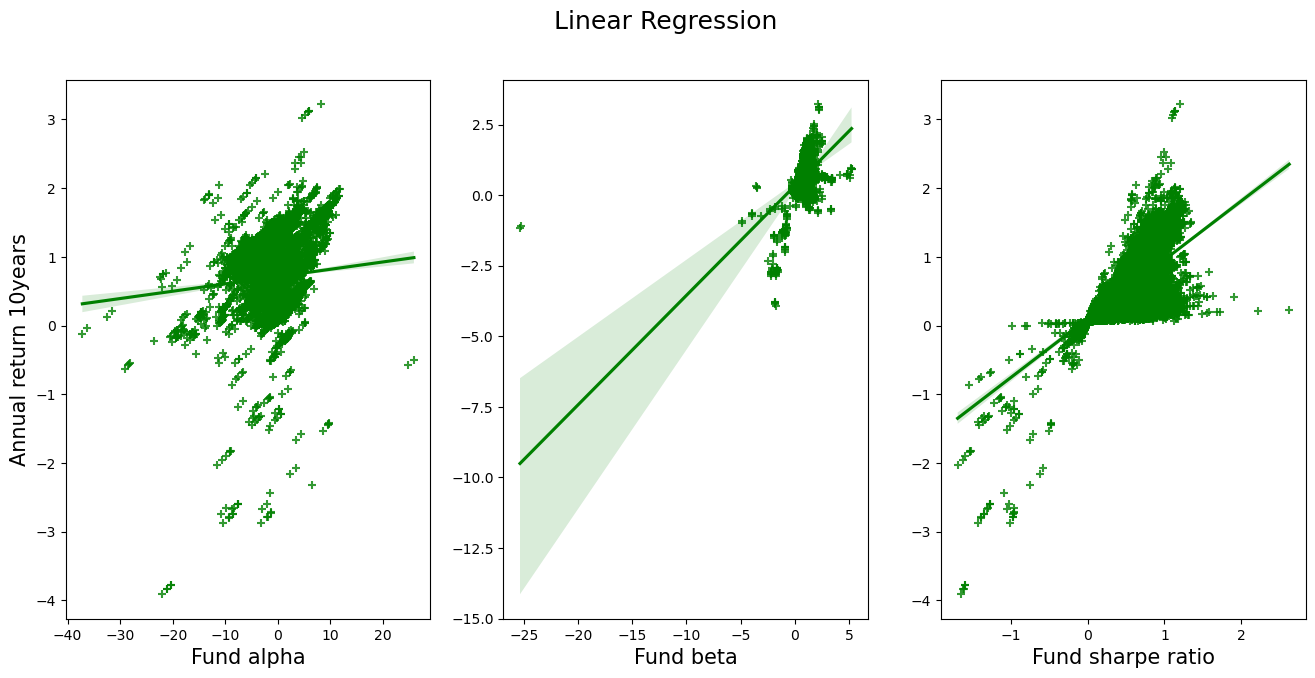

In [35]:
#regression line
fig, axes = plt.subplots(1, 3, figsize=(16, 7), gridspec_kw={'hspace': 0.0, 'wspace': 0.2})

fig.suptitle('Linear Regression', fontsize=18)

pen = sns.regplot(ax=axes[0],data=mf_df, x=mf_df.fund_alpha_10years, y=mf_df.fund_mean_annual_return_10years, color='g', marker='+')
pen.set_ylabel("Annual return 10years",fontsize=15)
pen.set_xlabel("Fund alpha",fontsize=15)

dun = sns.regplot(ax=axes[1],data=mf_df, x=mf_df.fund_beta_10years, y=mf_df.fund_mean_annual_return_10years, color='g', marker='+')
dun.set(ylabel='')
dun.set_xlabel("Fund beta",fontsize=15)

car = sns.regplot(ax=axes[2],data=mf_df, x=mf_df.fund_sharpe_ratio_10years, y=mf_df.fund_mean_annual_return_10years, color='g', marker='+')
car.set(ylabel='')
car.set_xlabel("Fund sharpe ratio",fontsize=15)

Text(0.5, 0, 'Fund sharpe ratio')

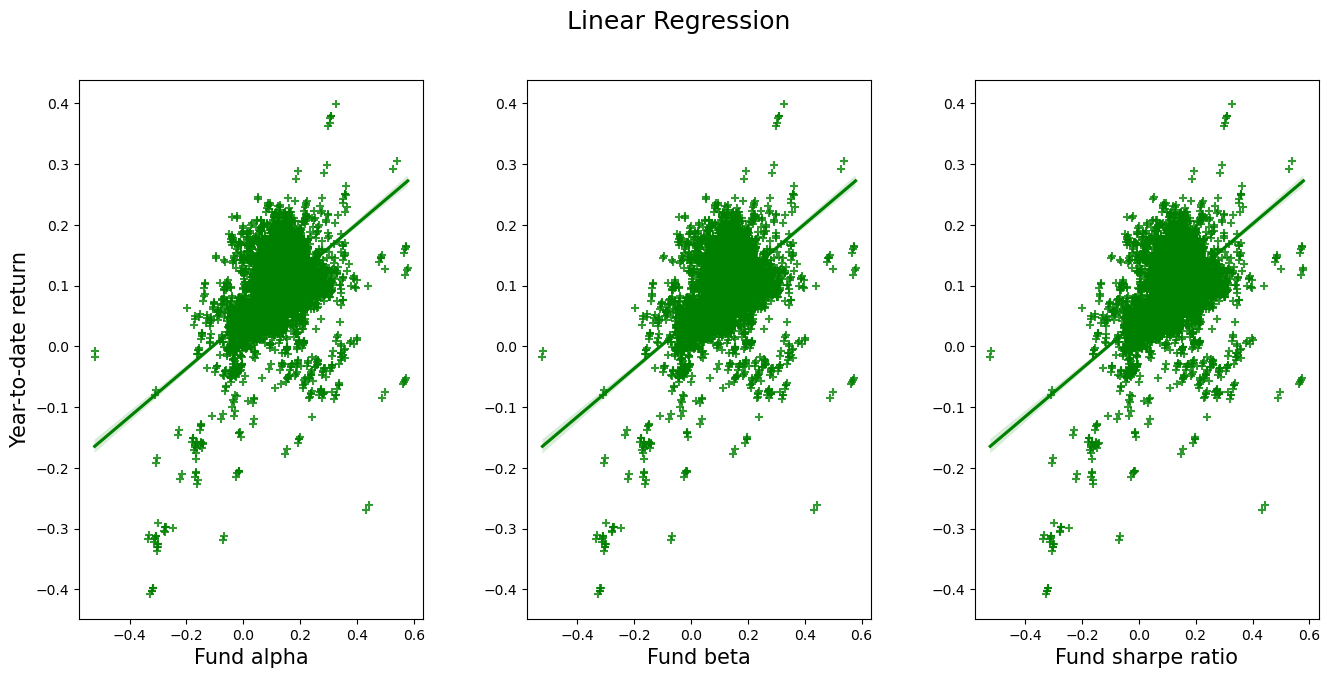

In [29]:
#regression line
fig, axes = plt.subplots(1, 3, figsize=(16, 7), gridspec_kw={'hspace': 0.0, 'wspace': 0.3})

fig.suptitle('Linear Regression', fontsize=18)

pen = sns.regplot(ax=axes[0],data=mf_df, x=mf_df.year_to_date_return, y=mf_df.fund_return_10years, color='g', marker='+')
pen.set_ylabel("Year-to-date return",fontsize=15)
pen.set_xlabel("Fund alpha",fontsize=15)

dun = sns.regplot(ax=axes[1],data=mf_df, x=mf_df.year_to_date_return, y=mf_df.fund_return_10years, color='g', marker='+')
dun.set(ylabel='')
dun.set_xlabel("Fund beta",fontsize=15)

car = sns.regplot(ax=axes[2],data=mf_df, x=mf_df.year_to_date_return, y=mf_df.fund_return_10years, color='g', marker='+')
car.set(ylabel='')
car.set_xlabel("Fund sharpe ratio",fontsize=15)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'hspace': 0.0, 'wspace': 0.3})

fig.suptitle('Linear Regression', fontsize=18)

#b.axes.set_title("Title",fontsize=50)
pen = sns.regplot(ax=axes[0],data=mf_df, x=mf_df.fund_return_10years, y=mf_df.esg_score, color='g', marker='+')
pen.set_ylabel("ESG score",fontsize=15)
pen.set_xlabel("fund return 10years",fontsize=15)

In [ ]:
ddf = mf_df[['fund_symbol','fund_category','fund_long_name','inception_date','size_type','esg_score','financial_score']]

Linear regression for selected variables

In [4]:
import statsmodels.api as sm

In [ ]:
# Fill missimg values with meanvalue
df2 = mf_df.fillna(mf_df.mean())
# Choose the independent variable, the predictor X
X = df2[['esg_score','fund_alpha_10years','fund_beta_10years','fund_sharpe_ratio_10years','total_net_assets']]

# Define dependent variable (since it's always a single variable, we can use dot notation here)
y = df2.fund_mean_annual_return_10years

display(X.head())
display(y.head())

In [6]:
X = sm.add_constant(X)
display(X.head())

,const,esg_score,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,total_net_assets
0,1.0,22.460000,-2.790000,0.960000,0.480000,2.979347e+09
1,1.0,27.050000,6.140000,0.750000,0.960000,1.953489e+08
2,1.0,23.767634,-0.672203,0.952347,0.705999,2.594600e+04
3,1.0,23.767634,-0.672203,0.952347,0.705999,2.594600e+04
4,1.0,20.550000,0.910000,1.080000,1.030000,2.078607e+09


In [7]:
# create an OLS model
our_model = sm.OLS(y, X)

# use the data to calculate the intercept and slope
model_results = our_model.fit()

# return the output of the model
model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     fund_mean_annual_return_10years   R-squared:                       0.404
Model:                                         OLS   Adj. R-squared:                  0.404
Method:                              Least Squares   F-statistic:                     3223.
Date:                             Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                                     14:45:16   Log-Likelihood:                -4102.0
No. Observations:                            23783   AIC:                             8216.
Df Residuals:                                23777   BIC:                             8264.
Df Model:                                        5                                         
Covariance Type:                         nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0140      0.021      0.674      0.500      -0.027       0.055
esg_score                    -0.0042      0.001     -5.179      0.000      -0.006      -0.003
fund_alpha_10years           -0.0030      0.001     -3.724      0.000      -0.005      -0.001
fund_beta_10years             0.2898      0.005     58.320      0.000       0.280       0.300
fund_sharpe_ratio_10years     0.7234      0.009     81.252      0.000       0.706       0.741
total_net_assets           4.546e-13   8.93e-14      5.092      0.000     2.8e-13     6.3e-13
==============================================================================
Omnibus:                     9860.730   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1017273.877
Skew:                           1.038   Prob(JB):                         0.00
Kurtosis:                      34.973   Cond. No.                     2.45e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Slope and Intercept for the case of a single independent variable, the predictor X
intercept, slope = model_results.params

print(f'intercept: {intercept}, slope: {slope}')

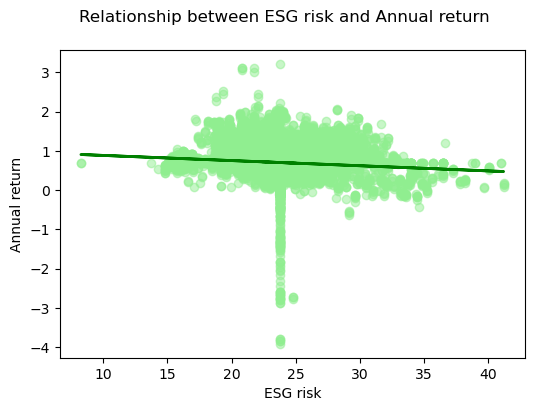

In [19]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(6, 4))

x = df_drop['esg_score']
y = df_drop['fund_mean_annual_return_10years']

# add data points
ax.scatter(x, y, alpha=0.5, color='lightgreen')
fig.suptitle('Relationship between ESG risk and Annual return')

# plotting the regression line with the help of our calculated intercept and slope variables
ax.plot(x, x*slope+intercept, '-', color='green', linewidth=2);
ax.set_ylabel("Annual return");
ax.set_xlabel("ESG risk");

For multiple linear regression

In [39]:
# Correlation
df_drop[['esg_score','morningstar_risk_rating','fund_alpha_10years','fund_beta_10years','fund_sharpe_ratio_10years','fund_mean_annual_return_10years','total_net_assets']].corr()

,esg_score,morningstar_risk_rating,fund_alpha_10years,fund_beta_10years,fund_sharpe_ratio_10years,fund_mean_annual_return_10years,total_net_assets
esg_score,1.000000,0.083269,-0.324985,0.075874,-0.187423,-0.085098,-0.025715
morningstar_risk_rating,0.083269,1.000000,-0.078320,0.143292,-0.090644,0.045883,-0.080877
fund_alpha_10years,-0.324985,-0.078320,1.000000,-0.266536,0.374883,0.079866,0.087508
fund_beta_10years,0.075874,0.143292,-0.266536,1.000000,0.223516,0.435230,0.007390
fund_sharpe_ratio_10years,-0.187423,-0.090644,0.374883,0.223516,1.000000,0.547191,0.129616
fund_mean_annual_return_10years,-0.085098,0.045883,0.079866,0.435230,0.547191,1.000000,0.088374
total_net_assets,-0.025715,-0.080877,0.087508,0.007390,0.129616,0.088374,1.000000


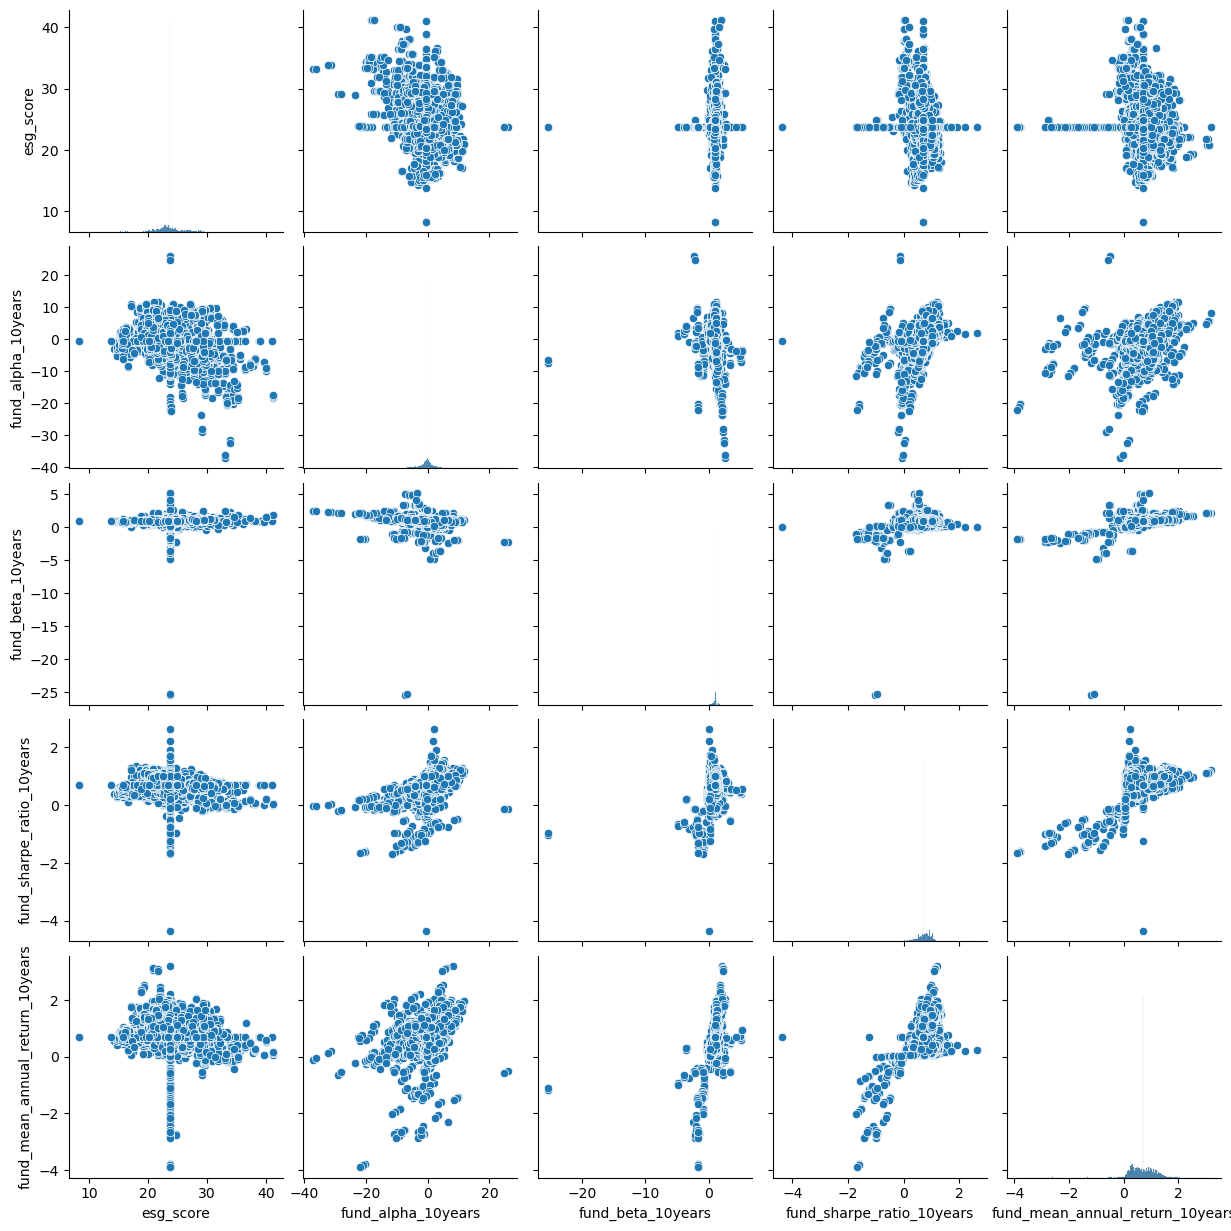

In [45]:
#Pairplot for multiple linear regression
X3 = df_drop[['esg_score','fund_alpha_10years','fund_beta_10years','fund_sharpe_ratio_10years','fund_mean_annual_return_10years']]
sns.pairplot(X3);